In [ ]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import OrthogonalMatchingPursuit
from sklearn.linear_model import PassiveAggressiveRegressor
from sklearn.svm import SVR
import pandas as pd
import matplotlib.pyplot as plt
from statistics import mean 
reg_models = [SVR, Lasso, Ridge, ElasticNet, OrthogonalMatchingPursuit, PassiveAggressiveRegressor]
for reg_model in reg_models:
    print(reg_model.__name__)

## Regression r2 of each algorithm for different window size

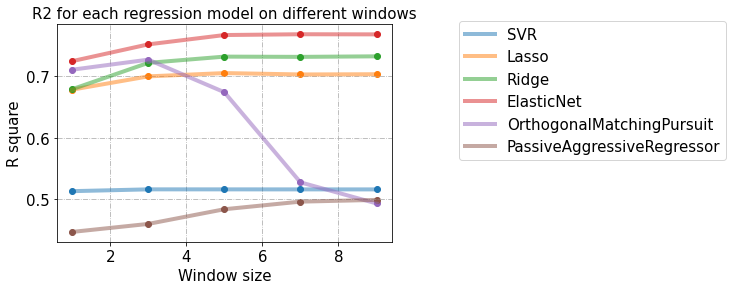

In [27]:


window_sizes=[1,3,5,7,9]
reg_window_sizes = []
for window_size in window_sizes:
    reg_window_size = pd.read_csv("window_size_{}_final.csv".format(window_size), index_col=0)
    reg_window_size = reg_window_size[4:-1]
    reg_window_sizes.append(reg_window_size)
model_list = ['SVR', 'Lasso', 'Ridge','ElasticNet', 'OrthogonalMatchingPursuit', 'PassiveAggressiveRegressor']
for model in model_list:
    plt.plot(window_sizes, [mean(reg_window_size[model]) for reg_window_size in reg_window_sizes],  label=model
    , linewidth = 4, alpha = 0.5)
    plt.scatter(window_sizes, [mean(reg_window_size[model]) for reg_window_size in reg_window_sizes], marker='o')

plt.title("R2 for each regression model on different windows", fontsize=15)
plt.legend(loc=8, bbox_to_anchor=(1.6, 0.34), fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("Window size", fontsize=15)
plt.ylabel("R square", fontsize=15)
plt.grid(linestyle = '-.')
# plt.tight_layout()
plt.savefig("picture/models_R2_windows_size.pdf", bbox_inches = 'tight')

0.7680356963709682


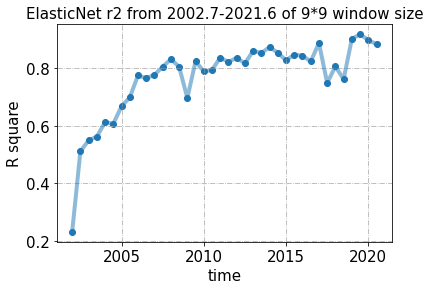

In [28]:
import pandas as pd
reg_results = pd.read_csv("window_size_9_final.csv", index_col=0)
reg_results = reg_results[4:-1]
import matplotlib.pyplot as plt
from statistics import mean 

x=[2002+i/2 for i in range(0,38)]
model = 'ElasticNet'
plt.plot(x, reg_results[model], label=model, linewidth = 4, alpha = 0.5)
plt.scatter(x, reg_results[model], marker='o')
print(mean(reg_results[model]))

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("time", fontsize=15)
plt.ylabel("R square", fontsize=15)
plt.grid(linestyle = '-.')
plt.title("ElasticNet r2 from 2002.7-2021.6 of 9*9 window size", fontsize=15)
plt.savefig("picture/ElasticNet_window_size_9.pdf", bbox_inches = 'tight')
plt.show()

## prediction_cycle_5years

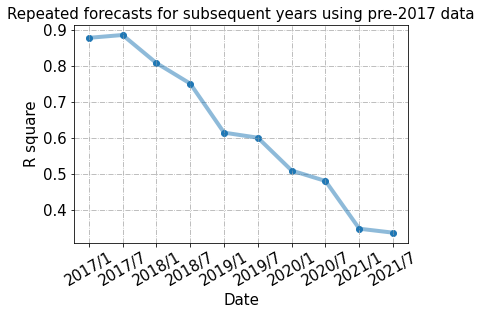

In [29]:
import matplotlib.pyplot as plt
import pandas as pd

lasso_r2_cycle_5 = pd.read_csv(
    '/home/jiasheng/ai_in_bio/lasso_cycle_5_2022.csv', index_col=0)
plt.plot(lasso_r2_cycle_5.iloc[33:]["date"].to_list(),
         lasso_r2_cycle_5.iloc[33:]["lasso_r2"].to_numpy(), linewidth = 4, alpha = 0.5)

plt.scatter(lasso_r2_cycle_5.iloc[33:]["date"].to_list(),
         lasso_r2_cycle_5.iloc[33:]["lasso_r2"].to_numpy(), marker='o')
plt.xlabel("Date", fontsize=15)
plt.ylabel("R square", fontsize=15)
plt.title("Repeated forecasts for subsequent years using pre-2017 data", fontsize=15)
plt.xticks(fontsize=15, rotation=30)
plt.yticks(fontsize=15)
plt.grid(linestyle = '-.')
plt.savefig("picture/prediction_cycle_5years.pdf", bbox_inches = 'tight')


## trend

In [8]:
import pandas as pd
import numpy as np
import gensim
import pickle
from gensim.models import Word2Vec
import pandas as pd
import nltk
from sklearn.linear_model import Lasso
import re
import glob
from gensim.models.phrases import Phrases, Phraser
import ahocorasick
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
C = ahocorasick.Automaton()
M = ahocorasick.Automaton()
def not_all_uppercase(str):
    for i in range(len(str)):
        if(str[i]>='a' and str[i]<='z'):
            return True
    return False

tot_cs=-1
tot_medical=-1
dict={}
last_conbine="hahhahahahahahahaha"
with open("cs1000_combine.txt") as f:
    for line in f:
        pos=line.strip().find(':')
        conbine=re.sub(r'_',' ',line.strip().lower()[pos+1:])
        if(conbine!=last_conbine):
            tot_cs+=1
        last_conbine=conbine
        C.add_word(re.sub(r'_',' ',line.strip().lower()[:pos]),tot_cs)
        dict[tot_cs]=conbine
        

with open("medical1000_combine.txt") as f:
    for line in f:
        pos=line.strip().find(':')
        conbine=re.sub(r'_',' ',line.strip().lower()[pos+1:])
        if(conbine!=last_conbine):
            tot_medical+=1
        last_conbine=conbine
        M.add_word(re.sub(r'_',' ',line.strip().lower()[:pos]),tot_medical)
        dict[5000+tot_medical]=conbine

p = np.load('pred_heat_future_319_ElasticNet.npy')
plot_heat = np.zeros_like(p)
for i in range(0, tot_cs+1):
    for j in range(0, tot_medical+1):
        plot_heat[i][j] = p[i+20][j+20]

In [14]:
print("TOP20 cs&medical:")
tmp=[]
name=[]
for c in range(0,tot_cs+1):
    for m in range(0,tot_medical+1):
        tmp.append(round(plot_heat[c,m]))
        name.append(dict[c]+" , "+dict[m+5000])
tmp,name=zip(*sorted(zip(tmp, name)))
names = []
tmps = []
for i in range(20):
    names.append(name[len(name)-1-i])
    tmps.append(tmp[len(name)-1-i])
    # print(name[len(name)-1-i],":",tmp[len(name)-1-i])
df = pd.DataFrame({'name': names, 'counts': tmps})
df.index = range(1, 21)
print(df.style.to_latex())

TOP20 cs&medical:
\begin{tabular}{llr}
 & name & counts \\
1 & machine learning , gene & 55591 \\
2 & artificial intelligence , early diagnosis & 54604 \\
3 & artificial intelligence , early detection & 45339 \\
4 & artificial intelligence , gene & 35462 \\
5 & neural network , gene & 33205 \\
6 & deep learning , computed tomography & 30716 \\
7 & artificial intelligence , systematic reviews & 29546 \\
8 & classification , gene & 28541 \\
9 & supervised learning , gene & 28344 \\
10 & generative adversarial network , gene & 24802 \\
11 & artificial intelligence , personalized treatment & 21008 \\
12 & machine learning , risk factors & 15728 \\
13 & deep learning , gene & 15108 \\
14 & artificial intelligence , systematic review & 14710 \\
15 & convolution neural network , gene & 14399 \\
16 & learning algorithm , gene & 14137 \\
17 & receiver operating characteristic , ct scans & 13852 \\
18 & machine learning , medical records & 13781 \\
19 & machine learning , blood pressure & 13570 

In [15]:
maxn=0
p = np.load('pred_heat_future_265_ElasticNet.npy')
plot_heat = np.zeros_like(p)
for i in range(0, tot_cs+1):
    for j in range(0, tot_medical+1):
        plot_heat[i][j] = p[i+20][j+20]
last_heat=plot_heat
p = np.load('pred_heat_future_319_ElasticNet.npy')
plot_heat = np.zeros_like(p)
for i in range(0, tot_cs+1):
    for j in range(0, tot_medical+1):
        plot_heat[i][j] = p[i+20][j+20]
heat=plot_heat

tmp=[]
name=[]
for c in range(0,tot_cs+1):
    for m in range(0,tot_medical+1):
        tmp.append(round(heat[c,m]-last_heat[c,m]))
        name.append(dict[c]+" , "+dict[m+5000])
tmp,name=zip(*sorted(zip(tmp, name)))
print("TOP20 increase of cs&medical:")
names = []
tmps = []
for i in range(20):
    names.append(name[len(name)-1-i])
    tmps.append(tmp[len(name)-1-i])
df = pd.DataFrame({'name': names, 'counts': tmps})
df.index = range(1, 21)
print(df.style.to_latex())
print(" ")
print("TOP20 decrease of cs&medical:")
names = []
tmps = []
for i in range(20):
    names.append(name[i])
    tmps.append(tmp[i])
df = pd.DataFrame({'name': names, 'counts': tmps})
df.index = range(1, 21)
print(df.style.to_latex())


TOP20 increase of cs&medical:
\begin{tabular}{llr}
 & name & counts \\
1 & artificial intelligence , early diagnosis & 54496 \\
2 & machine learning , gene & 51507 \\
3 & artificial intelligence , early detection & 45208 \\
4 & artificial intelligence , gene & 33955 \\
5 & neural network , gene & 30901 \\
6 & deep learning , computed tomography & 30219 \\
7 & artificial intelligence , systematic reviews & 29462 \\
8 & supervised learning , gene & 27916 \\
9 & classification , gene & 26474 \\
10 & generative adversarial network , gene & 24377 \\
11 & artificial intelligence , personalized treatment & 20986 \\
12 & machine learning , risk factors & 15369 \\
13 & artificial intelligence , systematic review & 14535 \\
14 & receiver operating characteristic , ct scans & 13781 \\
15 & machine learning , medical records & 13654 \\
16 & machine learning , blood pressure & 13427 \\
17 & convolution neural network , gene & 13368 \\
18 & learning algorithm , gene & 13208 \\
19 & artificial intell

In [1]:
import numpy as np
import pandas as pd
import numpy as np
import gensim
import pickle
from gensim.models import Word2Vec
import pandas as pd
import nltk
import re
import glob
from gensim.models.phrases import Phrases, Phraser
import ahocorasick
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
from sklearn.metrics import r2_score
from scipy.stats import spearmanr
import scipy.spatial as sp, scipy.cluster.hierarchy as hc

In [4]:
np.sum(np.random.rand(2,2))

2.346523551110876

structural_features      structural features      0
structural_information      structural information      1
physicochemical_properties      physicochemical properties      2
computational_complexity      computational complexity      3
feature_space      feature space      4
feature_vector      feature vector      5
mutual_information      mutual information      6
external_validation      external validation      7
nearest_neighbor      nearest neighbor      8
standard_deviation      standard deviation      9
correlation_coefficient      correlation coefficient      10
time_series      time series      11
missing_data      missing data      12
prediction_model      prediction model      13
predictive_model      prediction model      13
predictive_modeling      prediction model      13
computational_models      computational models      14
computational_approaches      computational models      14
computational_methods      computational models      14
statistical_methods      statis

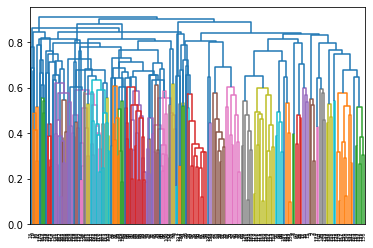

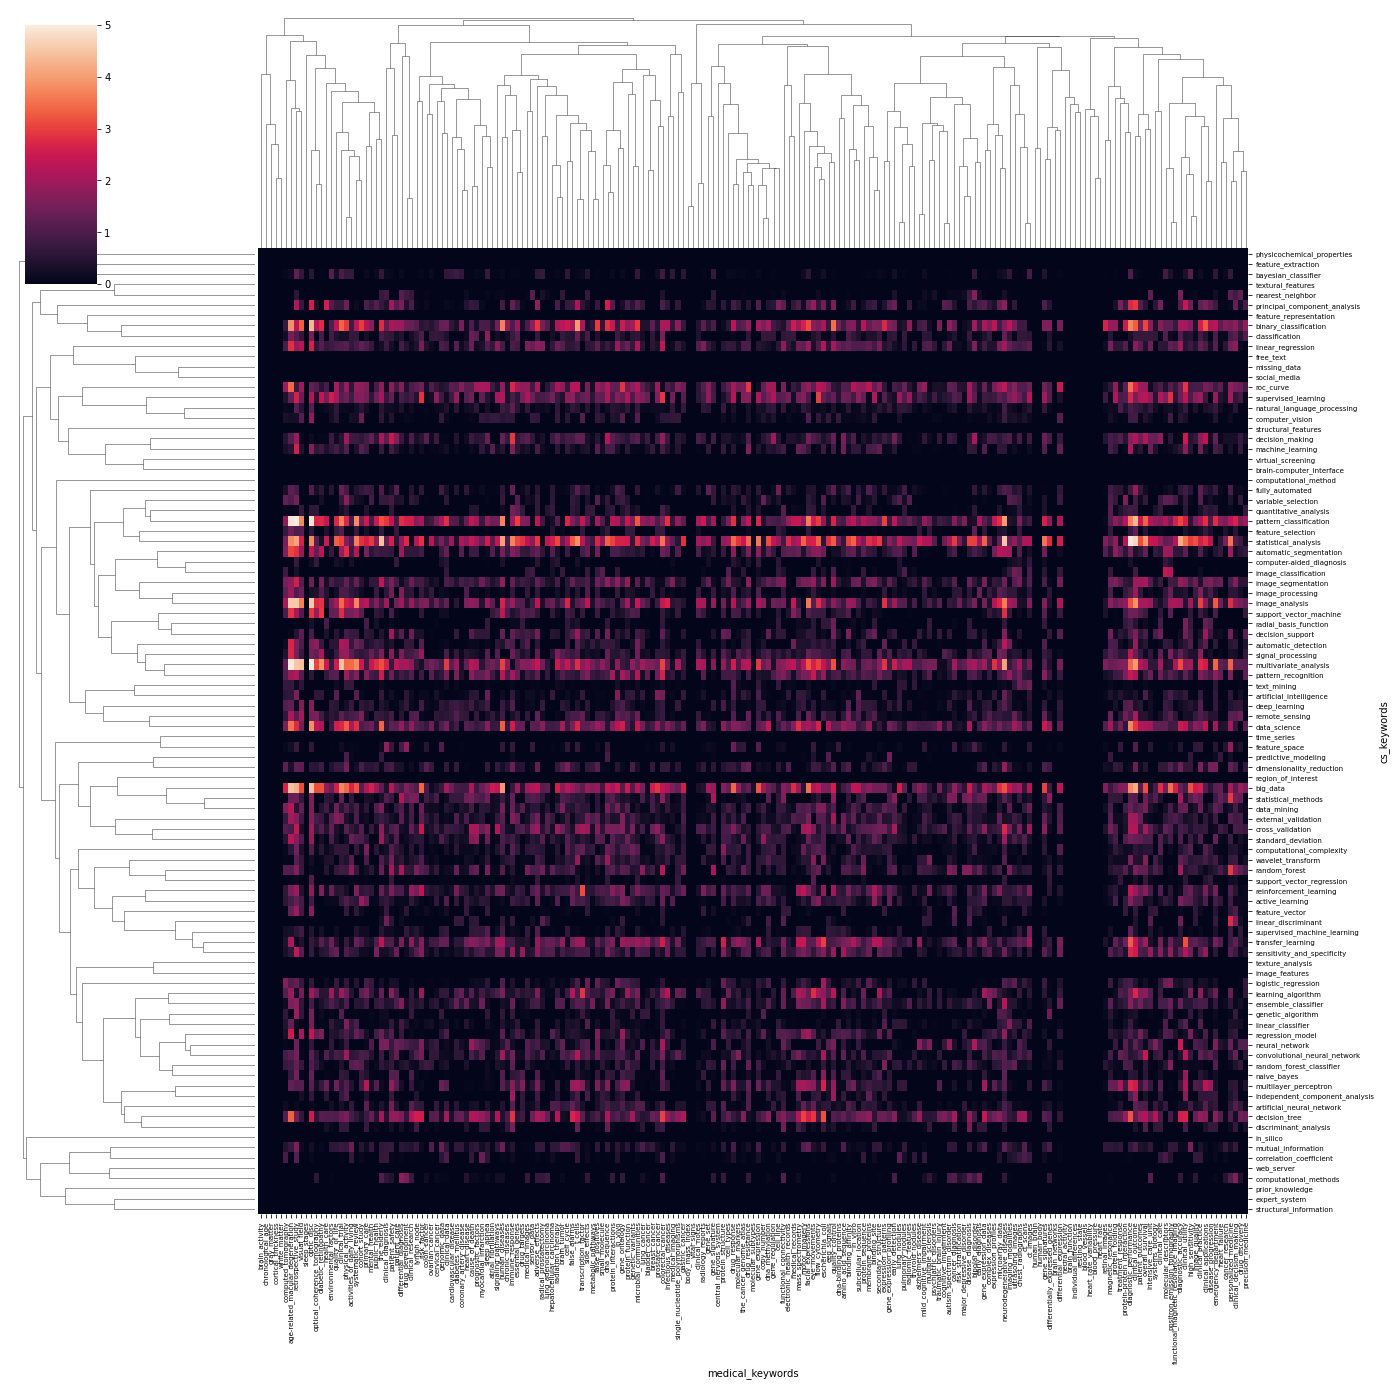

In [1]:


C = ahocorasick.Automaton()
M = ahocorasick.Automaton()
def not_all_uppercase(str):
    for i in range(len(str)):
        if(str[i]>='a' and str[i]<='z'):
            return True
    return False

tot_cs=-1
tot_medical=-1
dict={}
last_conbine="hahhahahahahahahaha"
with open("top200cs_combine.txt") as f:
    for line in f:
        pos=line.strip().find(':')
        conbine=re.sub(r'_',' ',line.strip().lower()[pos+1:])
        if(conbine!=last_conbine):
            tot_cs+=1
        last_conbine=conbine
        C.add_word(re.sub(r'_',' ',line.strip().lower()[:pos]),tot_cs)
        dict[tot_cs]=line.strip().lower()[:pos]
        print(line.strip().lower()[:pos],"    ",conbine,"    ",tot_cs)

with open("top200medical_combine.txt") as f:
    for line in f:
        pos=line.strip().find(':')
        conbine=re.sub(r'_',' ',line.strip().lower()[pos+1:])
        if(conbine!=last_conbine):
            tot_medical+=1
        last_conbine=conbine
        M.add_word(re.sub(r'_',' ',line.strip().lower()[:pos]),tot_medical)
        dict[5000+tot_medical]=line.strip().lower()[:pos]

C.make_automaton()
M.make_automaton()
# model = Word2Vec.load("word2vec/fulltext_abstract_phrases3.model")
model = Word2Vec.load("word2vec/fulltext_abstract_new.model")
row_dis=[]
col_dis=[]
for i in range(0,tot_cs+1):
    for j in range(i+1,tot_cs+1):
        row_dis.append(1-model.wv.similarity(dict[i],dict[j]))
        
for i in range(0,tot_medical+1):
    for j in range(i+1,tot_medical+1):
        col_dis.append(1-model.wv.similarity(dict[5000+i],dict[5000+j]))
row_linkage = hc.linkage(row_dis, method='average')
col_linkage= hc.linkage(col_dis, method='average')
row_order = hc.dendrogram(row_linkage)
col_order = hc.dendrogram(col_linkage)

pred_heat = np.load('pred_heat.npy')
last_heat = np.load('last_heat.npy')
diff_heat = (np.abs(pred_heat - last_heat))
plot_heat = np.log1p(diff_heat)
g=sns.clustermap(plot_heat, figsize=(20, 20), row_linkage=row_linkage, col_linkage=col_linkage, vmin=0, vmax=5,\
    yticklabels = [dict[r] for r in row_order['leaves']], xticklabels = [dict[5000 + c] for c in col_order['leaves']]) 

ax = g.ax_heatmap
ax.set_ylabel("cs_keywords")
ax.set_xlabel("medical_keywords")

ax.set_yticklabels(ax.get_ymajorticklabels(), fontdict={'fontsize':7})
ax.set_xticklabels(ax.get_xmajorticklabels(), fontdict={'fontsize':7})
# g.savefig("2019-6-actal_3.pdf")
g.savefig("picture/2021-12-diff_3.pdf")

In [5]:
import numpy as np
import pandas as pd
import re
from gensim.models import Word2Vec

In [6]:
h = np.random.rand(3,3)
np.sum(h)

3.802729939383216

In [4]:

cs_words = []
with open("cs1000_combine.txt") as f:
    for line in f:
        pos=line.strip().find(':')
        combine=line.strip().lower()[:pos]
        if combine in cs_words:
            continue
        cs_words.append(combine)

medical_words = []
with open("top200medical_combine.txt") as f:
    for line in f:
        pos=line.strip().find(':')
        combine=line.strip().lower()[:pos]
        if combine in medical_words:
            continue
        medical_words.append(combine)
words = cs_words + medical_words

In [2]:
model = Word2Vec.load("word2vec/fulltext_abstract_new.model")

In [4]:
cs = []
for cs_word in cs_words:
    wv = model.wv[cs_word]
    cs.append(wv)
medical = []
for medical_word in medical_words:
    wv = model.wv[medical_word]
    medical.append(wv)

In [6]:
cs = np.array(cs)
medical = np.array(medical)
np.save('word2vec_cs.npy', cs)
np.save('word2vec_medical.npy', medical)

In [5]:
cs = np.load('word2vec_cs.npy')
medical = np.load('word2vec_medical.npy')

In [6]:
from sklearn.manifold import TSNE
def to_df(words, label):
    words_class = words.shape[0]*[label]
    words_class = np.array(words_class)
    words_class = words_class.reshape(-1,1)

    tsne = TSNE(n_components=2) 
    words_tsne = tsne.fit_transform(words)
    words_tsne_data = pd.DataFrame(np.vstack([words_tsne.T, words_class.T]).T)
    df_tsne = pd.DataFrame(words_tsne_data)
    return df_tsne



In [7]:
df_cs = to_df(cs, 'cs')
df_cs[0] = df_cs[0].astype('float')
df_cs[1] = df_cs[1].astype('float')
df_medical = to_df(medical, 'medical')
df_medical[0] = df_medical[0].astype('float')
df_medical[1] = df_medical[1].astype('float')

/home/jiasheng/miniconda3/envs/ai_in_bio/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/jiasheng/miniconda3/envs/ai_in_bio/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/home/jiasheng/miniconda3/envs/ai_in_bio/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/jiasheng/miniconda3/envs/ai_in_bio/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [15]:
df_tsne = pd.concat([df_cs, df_medical])
df_tsne.columns = ['dim_1', 'dim_2', 'class']

In [17]:
df_tsne['words'] = words

In [18]:
keyword = 'clinic'
df_tsne['class'] = df_tsne.apply(lambda x: keyword if keyword in x['words'] else x['class'], axis=1)

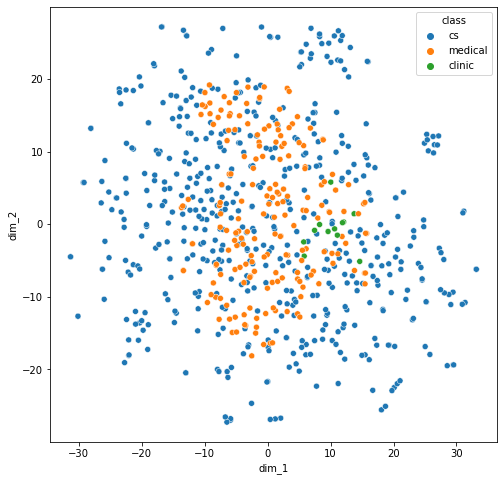

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 8))
sns.scatterplot(data=df_tsne, hue='class', x='dim_1', y='dim_2') 
# plt.show()
plt.savefig("picture/tsne_cs_medical.png", bbox_inches = 'tight')